## Step 1: Setting Up Our Tools and Loading the Data ##
First, we need to import the necessary Python libraries. These are like toolkits that give us the functions we need for data handling (pandas), numerical operations (numpy), and creating charts (matplotlib, seaborn). After that, we'll load our dataset from the CSV file into a structure called a DataFrame, which is essentially a clean, organized table.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 
#Load the data
df = pd.read_csv(r"C:\Users\achar\myprojects\Retail_Machine_Learning_Project\data\Retail_Prices_of_Products.csv")
df.head(10)

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM
0,2017,January,Province 1,Meat & Poultry,"Beef stewing cuts, per kilogram",12.66,No,11.0,12.66,Essential,11.10,Dollars
1,2017,January,Province 1,Meat & Poultry,"Beef striploin cuts, per kilogram",21.94,No,11.0,21.94,Essential,11.20,Dollars
2,2017,January,Province 1,Meat & Poultry,"Beef top sirloin cuts, per kilogram",13.44,No,11.0,13.44,Essential,11.30,Dollars
3,2017,January,Province 1,Meat & Poultry,"Beef rib cuts, per kilogram",20.17,No,11.0,20.17,Essential,11.41,Dollars
4,2017,January,Province 1,Meat & Poultry,"Ground beef, per kilogram",9.12,No,11.0,9.12,Essential,11.40,Dollars
5,2017,January,Province 1,Meat & Poultry,"Pork loin cuts, per kilogram",7.34,No,11.0,7.34,Essential,11.50,Dollars
6,2017,January,Province 1,Meat & Poultry,"Pork rib cuts, per kilogram",7.37,No,11.0,7.37,Essential,11.60,Dollars
7,2017,January,Province 1,Meat & Poultry,"Pork shoulder cuts, per kilogram",4.76,No,11.0,4.76,Essential,11.42,Dollars
8,2017,January,Province 1,Meat & Poultry,"Whole chicken, per kilogram",5.15,No,11.0,5.15,Essential,11.70,Dollars
9,2017,January,Province 1,Meat & Poultry,"Chicken breasts, per kilogram",11.38,No,11.0,11.38,Essential,11.80,Dollars


## Step 2: Understanding and Cleaning Our Data

Before we can analyze the data, we need to perform a "health check." This involves:

Checking for Missing Values: Ensuring there are no empty cells in our data table.

Getting Data Info: Understanding the type of data in each column (e.g., numbers, text, dates).

Checking for Duplicates: Removing any rows that are exact copies to prevent skewed results.

Luckily, our dataset is very clean with no missing values or duplicates.

In [2]:
#Check for any missing values in each column
df.isnull().sum()

Year                0
Month               0
GEO                 0
Product Category    0
Products            0
VALUE               0
Taxable             0
Total tax rate      0
Value after tax     0
Essential           0
COORDINATE          0
UOM                 0
dtype: int64

In [3]:
# Get a technical summary of the dataset, including column names, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   Products          118482 non-null  object 
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  object 
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  object 
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 10.8+ MB


In [4]:
# Check for duplicate rows and remove them if they exist
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [5]:
# Get descriptive statistics for numerical columns (like mean, standard deviation, min/max)
print("\nDescriptive Statistics:\n",df.describe())

categorical_cols= ['Month','GEO','Product Category','Products','Taxable','Essential','UOM']
print("\n Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    


Descriptive Statistics:
                 Year          VALUE  Total tax rate  Value after tax  \
count  118482.000000  118482.000000   118482.000000    118482.000000   
mean     2020.591837       5.437324       12.632134         5.515499   
std         2.355363       5.192748        2.899124         5.215311   
min      2017.000000       0.300000        5.000000         0.300000   
25%      2019.000000       2.850000       11.000000         2.910000   
50%      2021.000000       3.990000       13.000000         4.050000   
75%      2023.000000       5.810000       15.000000         5.947500   
max      2025.000000      48.450000       15.000000        48.450000   

          COORDINATE  
count  118482.000000  
mean        6.501741  
std         3.172173  
min         1.100000  
25%         3.750000  
50%         6.500000  
75%         9.240000  
max        11.990000  

 Unique Values in Categorical Columns:

Month: 12 unique values
Month
January      10881
February     10881
March    

# Step 3: Discovering Insights Through Visualization (EDA) 
Exploratory Data Analysis (EDA) is where we create charts to visually explore the data. This helps us spot trends, patterns, and relationships that aren't obvious from just looking at the raw numbers.

# Price Distribution by Product Category
This boxplot shows us the range of prices for each product category. The "box" represents the middle 50% of prices, the line inside is the median (average), and the dots are outliers—prices that are unusually high or low.

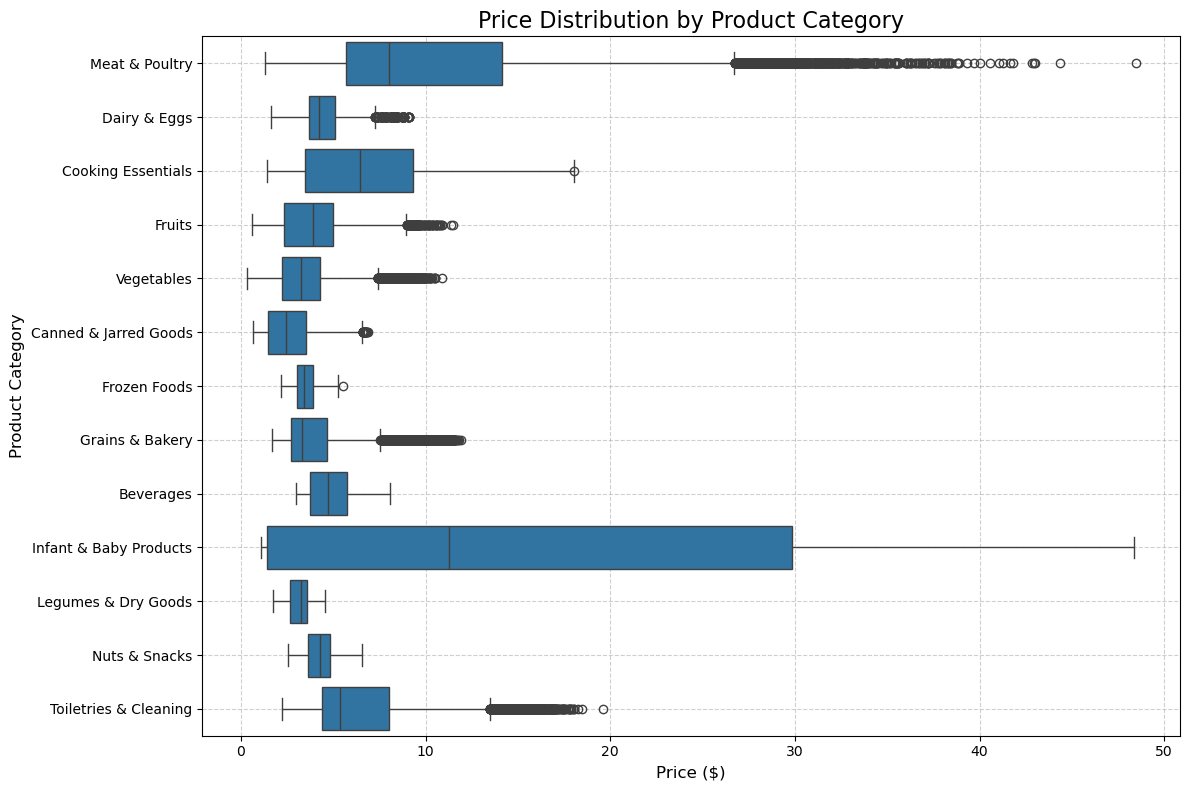

In [6]:
# Price Distribution by Category (Horizontal Boxplot)
plt.figure(figsize=(12, 8)) # Adjusted figure size for horizontal layout
sns.boxplot(x="VALUE", y="Product Category", data=df, orient='h')

plt.title("Price Distribution by Product Category", fontsize=16)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("PriceDistributionByCategory_Improved.png")
plt.show()

# Average Tax Rate by Province
This bar chart compares the average total tax rate across the different provinces in our dataset. We've added data labels to make the exact percentages clear.

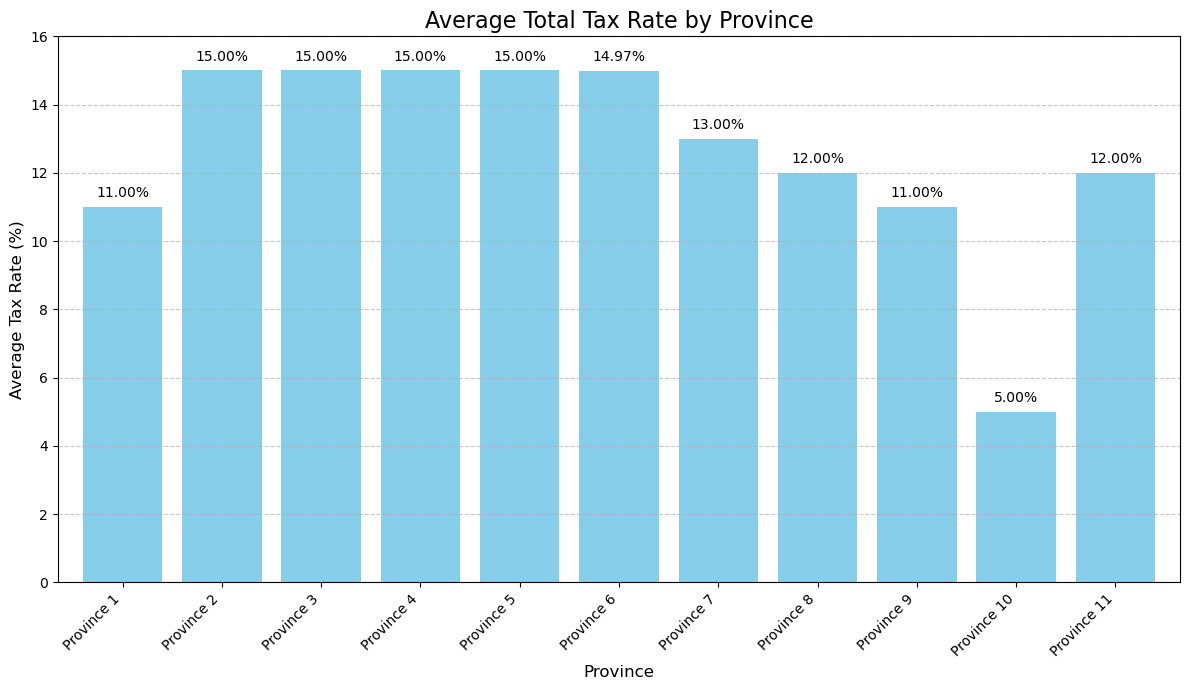

In [7]:
# Average Tax Rate by Province with Data Labels and Correct Sorting
avg_tax_rate = df.groupby("GEO")["Total tax rate"].mean()

# Create a list of provinces sorted numerically by extracting the number
sorted_provinces = sorted(avg_tax_rate.index, key=lambda p: int(p.split(' ')[1]))

# Reorder the data series according to the sorted list
avg_tax_rate_sorted = avg_tax_rate.reindex(sorted_provinces)

# Plot the newly sorted data
ax = avg_tax_rate_sorted.plot(kind="bar", figsize=(12, 7), color='skyblue', width=0.8)

plt.title("Average Total Tax Rate by Province", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Average Tax Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 16) # Give some space for labels

# Add data labels to each bar using the sorted data
for i, v in enumerate(avg_tax_rate_sorted):
    ax.text(i, v + 0.2, f"{v:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("TaxRateByProvince_Sorted_Improved.png")
plt.show()

# Average Product Price Trend Over Time
This line chart tracks how the average price of products has changed from 2017 to 2025, helping us see the overall trend.

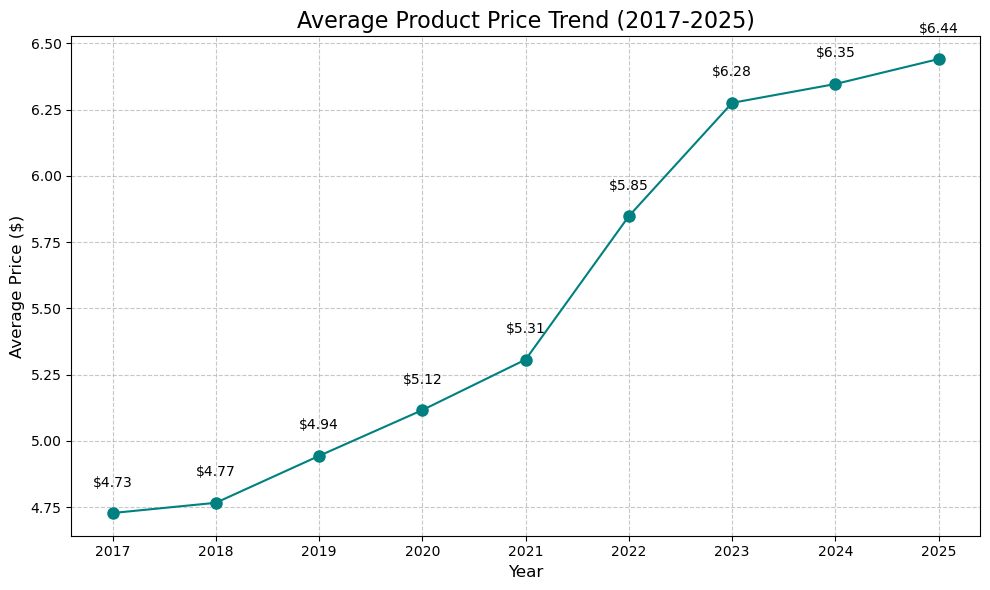

In [8]:
# Average Price Over Time with Data Labels
yearly_avg_price = df.groupby("Year")["VALUE"].mean()

plt.figure(figsize=(10, 6))
yearly_avg_price.plot(marker="o", linestyle='-', color='teal', markersize=8)

plt.title("Average Product Price Trend (2017-2025)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_avg_price.index) # Ensure all years are shown as ticks

# Add data labels to each marker
for year, price in yearly_avg_price.items():
    plt.text(year, price + 0.1, f"${price:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig("AveragePriceOverTime_Improved.png")
plt.show()

# Top 10 Most Expensive Products
This horizontal bar chart ranks the top 10 products by their average price, making it easy to see which items are the most expensive on average.

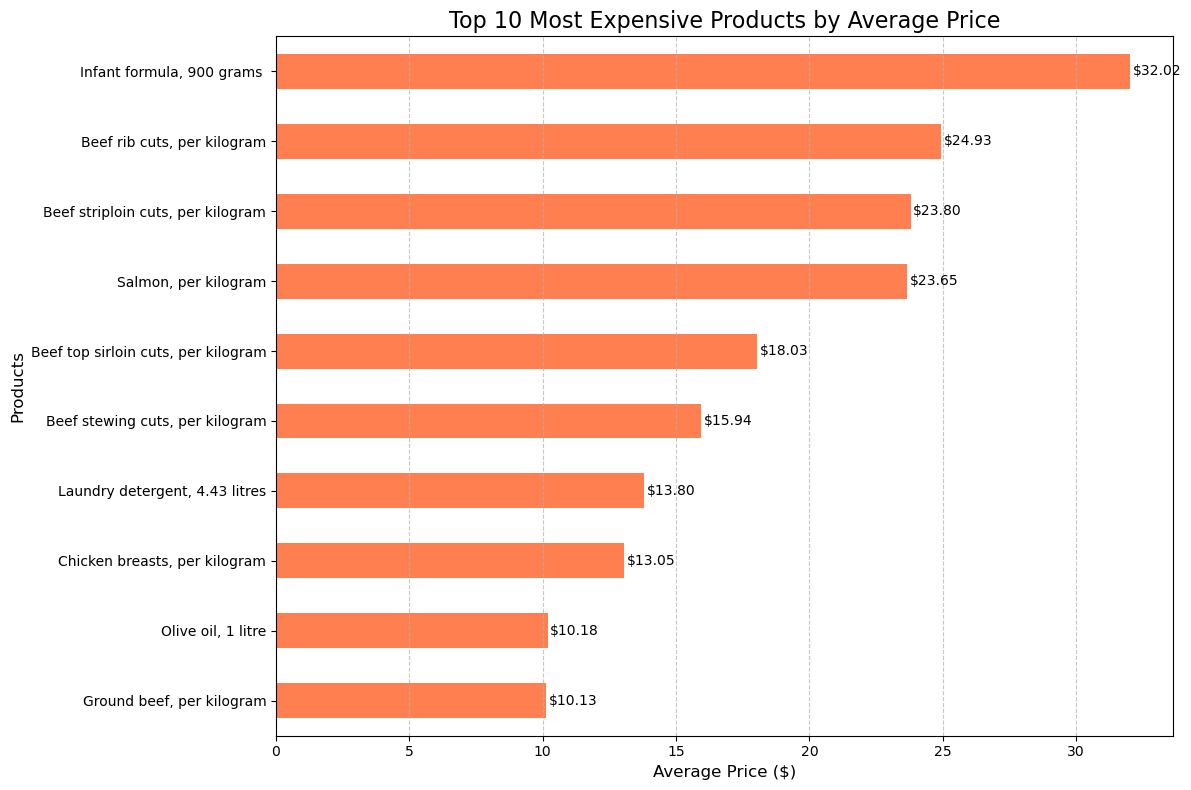

In [9]:
# Top 10 Most Expensive Products (on average) - Improved
top_10 = df.groupby("Products")["VALUE"].mean().sort_values(ascending=False).head(10)

# Reverse the order for plotting (so the highest value is on top)
ax = top_10.sort_values(ascending=True).plot(kind="barh", figsize=(12, 8), color='coral')

plt.title("Top 10 Most Expensive Products by Average Price", fontsize=16)
plt.xlabel("Average Price ($)", fontsize=12)
plt.ylabel("Products", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to the end of each bar
for i, v in enumerate(top_10.sort_values(ascending=True)):
    ax.text(v + 0.1, i, f"${v:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.savefig("TopMostExpensiveItems_Improved.png")
plt.show()

# Step 4: Preparing the Data for Machine Learning

Machine learning models work with numbers, not text. So, we need to convert our categorical features (like 'GEO' and 'Product Category') into a numerical format. This process is called one-hot encoding.

We also split our data into two parts:

Training Set (80%): The model "learns" from this data.

Testing Set (20%): We use this unseen data to test how well our model can make predictions.

In [10]:
# Define our target variable (what we want to predict) and our features (what we'll use for prediction)
target = "VALUE"
features = [
    "Year",
    "Month",
    "GEO",
    "Product Category",
    "Products",
    "Taxable",
    "Essential",
    "Total tax rate"
]

# One-hot encode categorical features. This converts text data into a numerical format for the model.
# 'drop_first=True' is used to avoid redundancy in the encoded columns.
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Add the target column ('VALUE') back to our encoded dataframe
df_encoded[target] = df[target]

# Separate the data into features (X) and the target variable (y)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Building and Evaluating Our Predictive Models
Now we'll build two different models to predict prices and compare their performance.

# Model 1: Linear Regression
Linear Regression is a fundamental model that tries to find a simple, straight-line relationship between the features and the price. We evaluate it using two key metrics:

R² Score: This tells us what percentage of the price variation our model can explain. A score of 0.94 means it explains 94% of the variation, which is very good.

RMSE (Root Mean Squared Error): This is the average error of our model's predictions, in dollars. A lower RMSE is better.

The scatter plot below compares the model's predicted prices to the actual prices. The closer the dots are to the red dashed line, the more accurate the predictions.

        Actual Price  Predicted Price
100366          2.96         3.146484
79047           4.38         4.511719
71219           5.97         5.912109
51956           5.89         5.976562
54954          14.95        15.783203

Root Mean Squared Error (RMSE): 1.242684147781828
R² Score: 0.9411814003286939


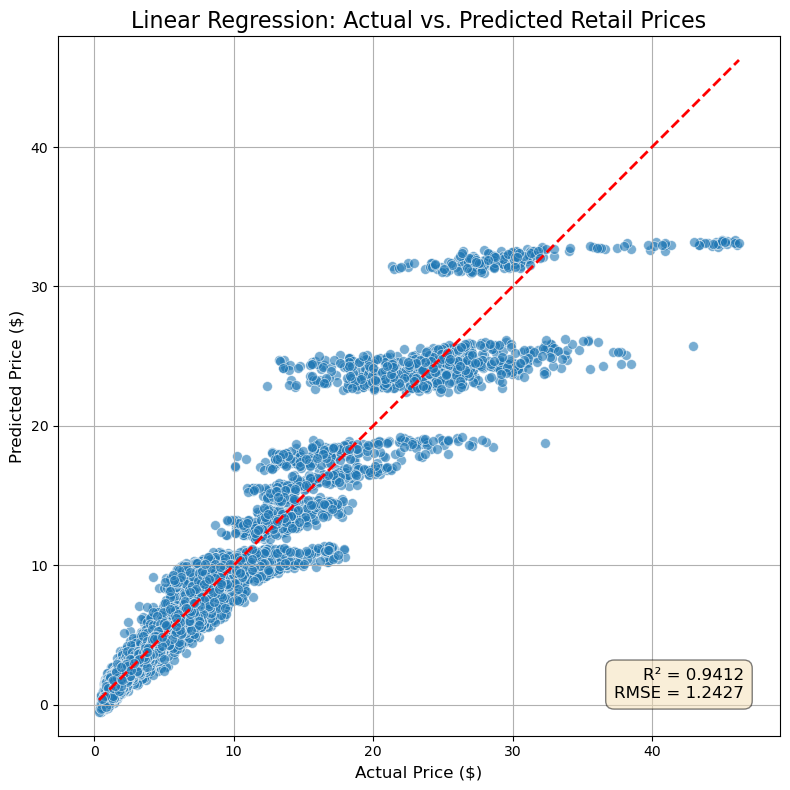

In [11]:
# 🤖Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈Predict on the test data and evaluate the performance
y_pred = model.predict(X_test)

# Compare predictions with actual values in a small table
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})
print(comparison_df.head())

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 =  r2_score(y_test, y_pred)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# --- Start of Improved Plotting Code ---

plt.figure(figsize=(8, 8)) # Make the figure square

# Scatterplot: predicted vs actual with transparency
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=50)

# Add perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')

# Add R² and RMSE scores as text on the plot for easy interpretation
stats_text = f'R² = {r2:.4f}\nRMSE = {rmse:.4f}'
plt.text(0.95, 0.05, stats_text, 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Labels and title
plt.xlabel("Actual Price ($)", fontsize=12)
plt.ylabel("Predicted Price ($)", fontsize=12)
plt.title("Linear Regression: Actual vs. Predicted Retail Prices", fontsize=16)
plt.grid(True)

# Set aspect ratio to equal for a fair visual comparison
plt.axis('equal')
plt.tight_layout()

plt.savefig("PredictedVSActual_Improved.png")
plt.show()

# Model 2: Random Forest Regression
Random Forest is a more powerful model that builds many "decision trees" and combines their predictions. This often leads to higher accuracy, especially with complex data. Here, we've configured a simpler version of the model to ensure it runs quickly.

In [12]:
# 📌 Random Forest Regression to Predict Retail Prices

# Simpler, faster model configuration
rf_model = RandomForestRegressor(n_estimators=25, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("🌲 Random Forest Regression Results (Optimized for Speed):")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


🌲 Random Forest Regression Results (Optimized for Speed):
Root Mean Squared Error (RMSE): 1.3615
R² Score: 0.9294


C:\Users\achar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Conclusion
In this analysis, we successfully cleaned the data, visualized key trends, and built two predictive models. The Linear Regression model performed slightly better on this dataset, achieving an R² score of 0.941, meaning it can explain over 94% of the price variance. This demonstrates that machine learning can be a very effective tool for predicting retail prices based on available data.